<a href="https://colab.research.google.com/github/ev-greshkina/DataAnalyst-educational-course/blob/main/%D0%94%D0%97_%D0%BA_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_5_%22onlineShoppingVis_ipynb%22_v_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В файле <i>orders</i> представлена информация о заказах в онлайн-магазине.
```
OrderID - ID Заказа,
UserID - ID клиента,
OrderTime - время заказа,
items - список элементов в заказе, каждый элемент описан словарем:
    ItemID  - ID продукта,
    price - цена единицы товара,
    quantity - количество единиц товара в заказе
```
В файле <i>categories</i> представлена информация о категории товаров.
```
ItemID - ID продукта,
Category - категория продукта,
ParentCategory - более крупная категория продукта
```

## Анализ логов продуктового магазина

Представьте, что вы работаете аналитиком онлайн-магазина и ваша цель - повысить GMV (суммарную выручку от продажи товаров). Для этого вы хотите провести ряд исследований и придумать какие-то меры для увеличения выручки.

* Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?
* Исследуйте и покажите на графике, как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
* Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
* Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Для скачивания файлов из репозитория в Colab
!wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv -P data
!wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json -P data

--2024-09-19 17:11:29--  https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2246830 (2.1M) [text/plain]
Saving to: ‘data/categories.csv’

categories.csv      100%[===================>]   2.14M  --.-KB/s    in 0.07s   

2024-09-19 17:11:30 (31.9 MB/s) - ‘data/categories.csv’ saved [2246830/2246830]

--2024-09-19 17:11:30--  https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent,

In [3]:
categories = pd.read_csv('data/categories.csv')
orders = pd.read_json('data/orders.json')

In [6]:
categories.head()


,ItemID,Category,ParentCategory
0,1000002,Сладости для диабетиков,Сладости
1,1000046,Вода,Напитки
2,1000048,Сладости для диабетиков,Сладости
3,1000049,Вода,Напитки
4,1000061,Фрукты,Овощи и фрукты


In [8]:
orders.head()

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"[{'ItemID': '413736', 'price': 36.72, 'quantit...",2021-01-01
1,90622054,2.499293e+18,2021-01-01 04:13:13,"[{'ItemID': '961454', 'price': 179.9, 'quantit...",2021-01-01
2,90659952,3.945866e+17,2021-01-01 05:48:53,"[{'ItemID': '306553', 'price': 101.9, 'quantit...",2021-01-01
3,89765281,5.412765e+18,2021-01-01 08:33:41,"[{'ItemID': '979703', 'price': 99.9, 'quantity...",2021-01-01
4,90582308,6.380061e+18,2021-01-01 09:55:35,"[{'ItemID': '303765', 'price': 44.9, 'quantity...",2021-01-01


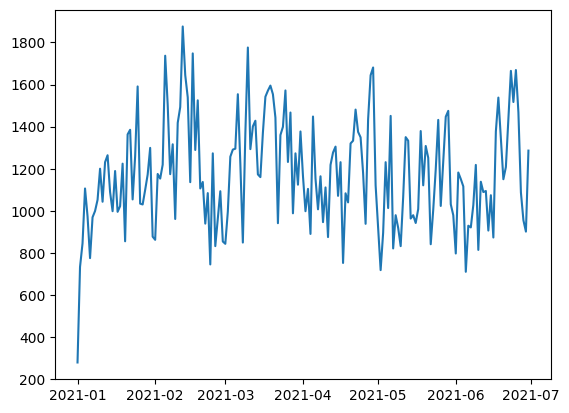

In [29]:
# Задача 1. Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?

# Перебрать все строки orders и добавить в каждый словарь в колонке items пару
# ключ-значение где ключ - слово "Дата", значение - соответствующая дата из текущей строки.
for row in orders.index:
  for elem in orders.loc[row, 'items']:
    elem['item_date'] = orders.loc[row, 'Date']

# Переменная пустой список для хранения всех словарей из колонки items
all_items = []

# Получить список всех словарей из колонки items
for row in orders.index:
  all_items.extend(orders.loc[row, 'items'])

# Преобразовать список в DataFrame
df_all_items = pd.DataFrame(all_items)

# Преобразовать столбец ItemID в формат int для соединения таблиц (столбцы
# по которым будет соединение должны иметь одинаковый формат)
df_all_items.ItemID = df_all_items.ItemID.astype('int64')

# Объединить с таблицей categories по значению ItemID
all_items_with_categories = df_all_items.merge(categories, left_on='ItemID', right_on='ItemID', suffixes=('_left', '_righy'))

# Отфильтровать по родительской категории "Напитки"
filtered_items = all_items_with_categories[all_items_with_categories['ParentCategory'] == 'Напитки']

# Сортировать по значению item_date
sorted_items = filtered_items.sort_values('item_date', ascending = True)

# Группировать по дате
groupped_items_by_date = sorted_items.groupby('item_date')

# Суммировать по значению quantuty
sum_by_group_items = groupped_items_by_date.agg({'quantity': 'sum'})

# Переиндексировать
sum_by_group_items = sum_by_group_items.reset_index()

# Построить диаграмму
#plt.plot(df["Rank"], df["P75th"])
plt.plot(sum_by_group_items['item_date'], sum_by_group_items['quantity'])


Ответ на задание 1. Диаграмма выручки от продажи напитков показывает возростание спроса накануне праздников: 23 февраля, 8 марта и майские праздники. Кроме того, пиковое значение продаж напитков наблюдается во второй половине июня. Вероятно связано с повышением температуры воздуха в летний период и повышением потребления воды.

In [86]:
# Задача 2. Исследуйте и покажите на графике, как отличаются продажи в будние и выходные
# в категориях 'Сокосодержащие напитки, смузи' и "Печенье" ?


# Перебрать все строки orders и добавить в каждый словарь в колонке items пару
# ключ-значение где ключ - слово "Дата", значение - соответствующая дата из текущей строки.
for row in orders.index:
  for elem in orders.loc[row, 'items']:
    elem['item_date'] = orders.loc[row, 'Date']

# Переменная пустой список для хранения всех словарей из колонки items
all_items = []

# Получить список всех словарей из колонки items
for row in orders.index:
  all_items.extend(orders.loc[row, 'items'])

# Преобразовать список в DataFrame
df_all_items = pd.DataFrame(all_items)

# Преобразовать столбец ItemID в формат int для соединения таблиц (столбцы
# по которым будет соединение должны иметь одинаковый формат)
df_all_items.ItemID = df_all_items.ItemID.astype('int64')

# Объединить с таблицей categories по значению ItemID
all_items_with_categories = df_all_items.merge(categories, left_on='ItemID', right_on='ItemID', suffixes=('_left', '_right'))

# Добавить столбец с днями недели
all_items_with_categories["WeekDayName"] = all_items_with_categories["item_date"].dt.day_name()



In [87]:
# Создать DataFrame содержащий столбцы quantity, Categorie, Categorie, WeekDayName
all_items_with_categories = all_items_with_categories[['quantity', 'Category', 'WeekDayName']]

# Отфильтровать по категории 'Сокосодержащие напитки, смузи' и "Печенье"
filtered_items = all_items_with_categories[(all_items_with_categories['Category'] == 'Сокосодержащие напитки, смузи') |
 (all_items_with_categories['Category'] == 'Печенье')]

# Сортировать по столбцу Category
sorted_items = filtered_items.sort_values('Category')

# Группировать по столбцам WeekDayName и Category
grupped_items = filtered_items.groupby(['WeekDayName', 'Category'])

# Суммировать по значению quantity
summed_items = grupped_items.agg({'quantity': 'sum'})

# Переиндексировать
result = summed_items.reset_index()

# Сортировать по дням недели с упорядочиванием дней
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result['WeekDayName'] = pd.Categorical(result['WeekDayName'], categories=days, ordered=True)
result = result.sort_values('WeekDayName')

# Переиндексировать и оставить стобцы: WeekDayName, Category, quantity
result = result.reset_index()
result = result[['WeekDayName', 'Category', 'quantity']]

# Вывести итоговую таблицу
result


,WeekDayName,Category,quantity
0,Monday,Печенье,2919
1,Monday,"Сокосодержащие напитки, смузи",303
2,Tuesday,Печенье,3628
3,Tuesday,"Сокосодержащие напитки, смузи",286
4,Wednesday,Печенье,3043
5,Wednesday,"Сокосодержащие напитки, смузи",318
6,Thursday,Печенье,3161
7,Thursday,"Сокосодержащие напитки, смузи",265
8,Friday,Печенье,3374
9,Friday,"Сокосодержащие напитки, смузи",324


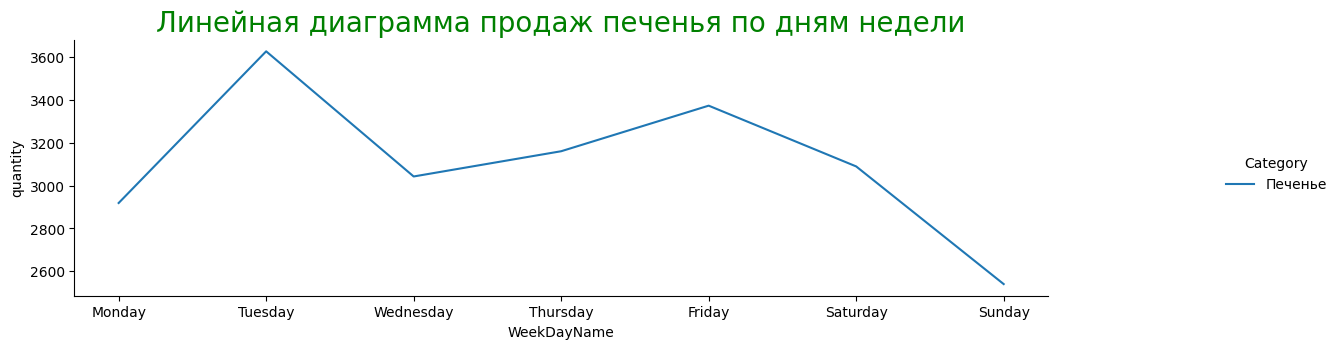

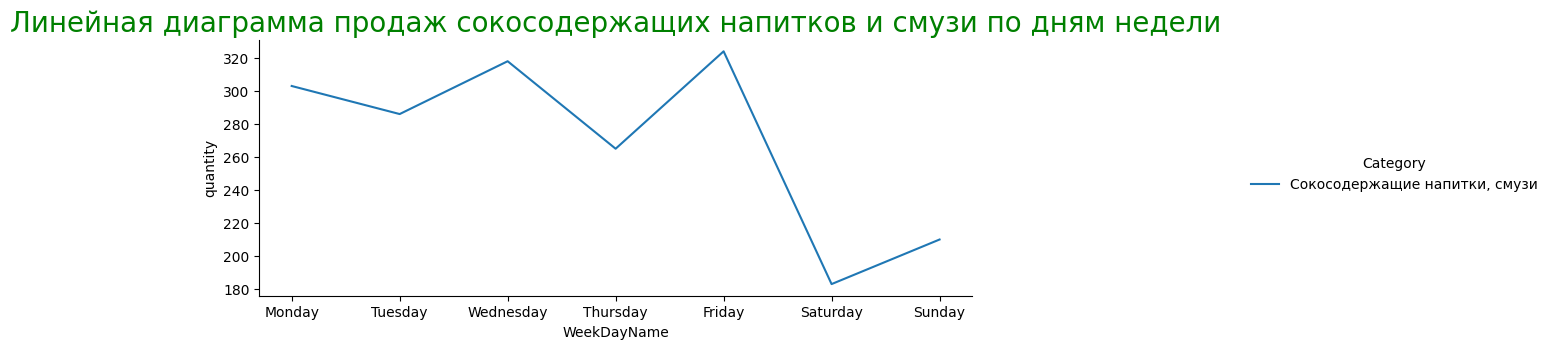

In [88]:
sns.relplot(
    x='WeekDayName',
    y='quantity',
    hue='Category',
    data=result[result['Category'] == 'Печенье'], kind='line')
plt.title('Линейная диаграмма продаж печенья по дням недели', size=20, color='g')
plt.gcf().set_size_inches(15, 3)

sns.relplot(
    x='WeekDayName',
    y='quantity',
    hue='Category',
    data=result[result['Category'] == 'Сокосодержащие напитки, смузи'], kind='line')
plt.title('Линейная диаграмма продаж сокосодержащих напитков и смузи по дням недели', size=20, color='g')
plt.gcf().set_size_inches(15, 3)

Ответ на задание 2. График продаж товаров категории "Печенье" по дням недели показывает, наибольшие продажи приходятся на Вторник, наименьшие на Воскресенье. Остальные будние дни и Суббота примерно одинаковая динамика продаж.

График продаж товаров категорий "Сокосодержащие напитки и смузи" по дням недели показывает, что основые продажи данных категорий товаров приходятся на будние дни. В выходные дни наблюдается существенный спад.

In [89]:
# Задача 3. Визуализируйте структуру продаж ParentCategory по показателю GMV за
# один месяц. Укажите категорию с наибольшей долей GMV.

# Перебрать все строки orders и добавить в каждый словарь в колонке items пару
# ключ-значение где ключ - слово "Дата", значение - соответствующая дата из текущей строки.
for row in orders.index:
  for elem in orders.loc[row, 'items']:
    elem['item_date'] = orders.loc[row, 'Date']

# Переменная пустой список для хранения всех словарей из колонки items
all_items = []

# Получить список всех словарей из колонки items
for row in orders.index:
  all_items.extend(orders.loc[row, 'items'])

# Преобразовать список в DataFrame
df_all_items = pd.DataFrame(all_items)

# Преобразовать столбец ItemID в формат int для соединения таблиц (столбцы
# по которым будет соединение должны иметь одинаковый формат)
df_all_items.ItemID = df_all_items.ItemID.astype('int64')

# Добавить столбец cost содержащий сумму затрат на приобретение товара (значение
# столбца price умноженное на quantity)
df_all_items_with_cost = df_all_items.assign(cost = df_all_items['price'] * df_all_items['quantity'])

# Объединить таблицы df_all_items и categories по значениям столбцов ItemID
all_items_with_categories = df_all_items_with_cost.merge(categories,
                                                         left_on='ItemID',
                                                         right_on ='ItemID',
                                                         suffixes=('_left', '_right'))

# Создать новый DataFrame, содержащий столбцы item_date, cost и ParentCategory
cost_and_date_of_parent_categorie = all_items_with_categories[['item_date','cost', 'ParentCategory']]


In [91]:
# Получить выборку строк с данными о продажах за 1 месяц (уловно принят март 2021года)
filtered_items_by_month = cost_and_date_of_parent_categorie[
    (cost_and_date_of_parent_categorie['item_date'] >= '2021-03-01') &
    (cost_and_date_of_parent_categorie['item_date'] <= '2021-03-31')]

# Сгруппировать по столбцу ParentCategory
grouped_items = filtered_items_by_month.groupby('ParentCategory')

# Суммировать группы
aggregated_items = grouped_items.agg({'cost': 'sum'})

# Пребразовать index в столбец
result = aggregated_items.reset_index()

# Добавить столбец с процентом цены ParentCategory от общей суммы затрат для
# использования значений при построении диаграммы (указать в легенде)
# Значение процентов округлить до двух знаков после запятой
result['cost_percent'] = round((result['cost'] * 100 / result['cost'].sum()), 2)
result

,ParentCategory,cost,cost_percent
0,Бакалея,4932634.51,14.97
1,Бытовая химия,1210495.16,3.67
2,Для детей,482367.64,1.46
3,Для дома и сада,485422.37,1.47
4,Для праздника,73156.12,0.22
5,Для школы,5133.75,0.02
6,Зоотовары,787265.45,2.39
7,"Красота, гигиена, здоровье",1418434.23,4.31
8,Кухонные принадлежности,227261.84,0.69
9,Молочная продукция,5183252.19,15.74


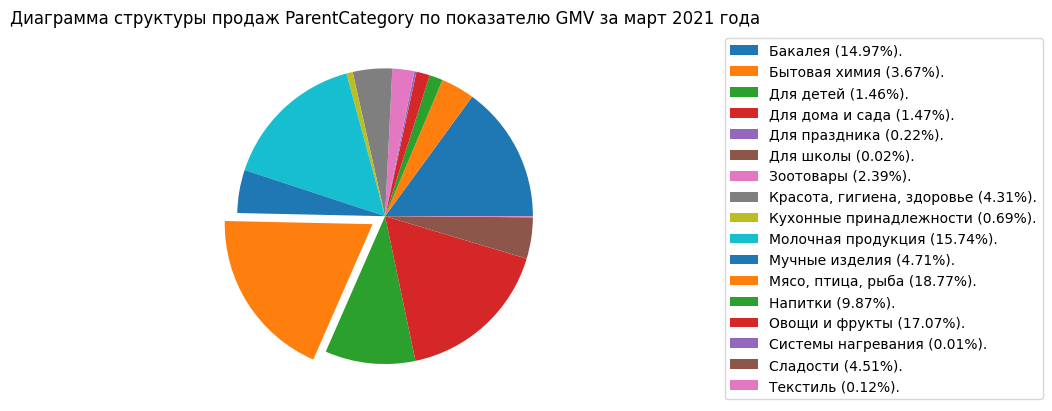

In [118]:
# Визуализировать структуру продаж в виде круговой диаграммы с легендой

# Получить списки для построения диаграммы
parent_category = result['ParentCategory'].tolist()
cost = result['cost'].tolist()
cost_percent = result['cost_percent'].tolist()

# Получить значения для указания в легенде
i = 0
legend_items = []
parent_category
for elem in parent_category:
  elem = elem + ' (' + str(cost_percent[i]) + '%).'
  legend_items.append(elem)
  i += 1

# Получить значение explode для выделения наибольшего сектора
# Получение индекса максимальног значения списка cost
max_cost_index = cost.index(max(cost))
# Создание списка с длиной, равной длине списка cost, в котором все значения равны 0
explode = [0] * len(cost)
# Увеличение на 0.1 значения элемента с индексом, равным индексу максимального значения
explode[max_cost_index] = explode[max_cost_index] + 0.1


fig, ax = plt.subplots()
ax.pie(cost, explode=explode)
ax.legend(loc='best', bbox_to_anchor=(1.4, 1.0), labels = legend_items)
plt.title('Диаграмма структуры продаж ParentCategory по показателю GMV за март 2021 года')
plt.show()

Ответ на задание 3.
За исследуемый месяц принят март 2021 года.
ParentCategoty с наибольшей долей GMV - "Мясо, птица, рыба". Процент продаж продуктов данной родительской категории составляет 18,77%.


In [4]:
# Задание 4. Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и
# напитками:'Вода', 'Газированные напитки', 'Соки, нектары', 'Лимонады',
# 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


# Перебрать все строки orders и добавить в каждый словарь в колонке items пару
# ключ-значение где ключ - слово "Дата", значение - соответствующая дата из текущей строки.
for row in orders.index:
  for elem in orders.loc[row, 'items']:
    elem['item_date'] = orders.loc[row, 'Date']

# Переменная пустой список для хранения всех словарей из колонки items
all_items = []

# Получить список всех словарей из колонки items
for row in orders.index:
  all_items.extend(orders.loc[row, 'items'])

# Преобразовать список в DataFrame
df_all_items = pd.DataFrame(all_items)

# Преобразовать столбец ItemID в формат int для соединения таблиц (столбцы
# по которым будет соединение должны иметь одинаковый формат)
df_all_items.ItemID = df_all_items.ItemID.astype('int64')

# Объединить с таблицей categories по значению ItemID
all_items_with_categories = df_all_items.merge(categories, left_on='ItemID', right_on='ItemID', suffixes=('_left', '_right'))

all_items_with_categories

,ItemID,price,quantity,item_date,Category,ParentCategory
0,413736,36.72,2,2021-01-01,Мороженое,Молочная продукция
1,413736,45.90,1,2021-01-02,Мороженое,Молочная продукция
2,413736,45.90,2,2021-01-03,Мороженое,Молочная продукция
3,413736,42.22,2,2021-01-03,Мороженое,Молочная продукция
4,413736,41.31,10,2021-01-04,Мороженое,Молочная продукция
...,...,...,...,...,...,...
852813,1056007,475.00,1,2021-06-30,Торты,Мучные изделия
852814,690039,59.90,1,2021-06-30,"Йогурты, творожки, десерты",Молочная продукция
852815,1015150,299.90,1,2021-06-30,Соленья,Овощи и фрукты
852816,1000528,22.46,1,2021-06-30,Косметика для глаз,"Красота, гигиена, здоровье"


In [17]:
# Создать новый DataFrame, содержащий колонки quantity, item_date, Category
df_for_analysis = all_items_with_categories[['item_date','quantity', 'Category']]

# Получить выборку строк, содержащие искомые категории товаров
# 'Чипсы, снеки, попкорн' и
# напитками:'Вода', 'Газированные напитки', 'Соки, нектары', 'Лимонады',
# 'Безалкогольное пиво', 'Вино', 'Пиво'
filtered_items = df_for_analysis[(df_for_analysis['Category'] == 'Чипсы, снеки, попкорн') |
                                 (df_for_analysis['Category'] == 'Вода') |
                                 (df_for_analysis['Category'] == 'Газированные напитки') |
                                 (df_for_analysis['Category'] == 'Соки, нектары') |
                                 (df_for_analysis['Category'] == 'Лимонады') |
                                 (df_for_analysis['Category'] == 'Безалкогольное пиво') |
                                 (df_for_analysis['Category'] == 'Вино') |
                                 (df_for_analysis['Category'] == 'Пиво')]

# Группировать данные по столбцам item_date и Category
grupped_items = filtered_items.groupby(['item_date', 'Category'])

# Суммировать сгруппированные данные по столбцу quantity
summed_items = grupped_items.agg({'quantity': 'sum'})

# Переиндексировать
result = summed_items.reset_index()

# Для удобства визуализации, данные о продажах товара "Вода" уменьшить в 10 раз
for row in result:
  if result.loc[row, 'Category'] == 'Вода':
    result.loc[row, 'quantity'] = result.loc[row, 'quantity'] / 10

result

<ipython-input-17-05600f5373fd>:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[row, 'quantity'] = result.loc[row, 'quantity'] / 10


,item_date,Category,quantity
0,2021-01-01,Безалкогольное пиво,7.0
1,2021-01-01,Вода,15.4
2,2021-01-01,Газированные напитки,12.0
3,2021-01-01,Лимонады,5.0
4,2021-01-01,"Соки, нектары",40.0
...,...,...,...
979,2021-06-30,Безалкогольное пиво,44.0
980,2021-06-30,Вода,78.5
981,2021-06-30,Газированные напитки,77.0
982,2021-06-30,Лимонады,6.0


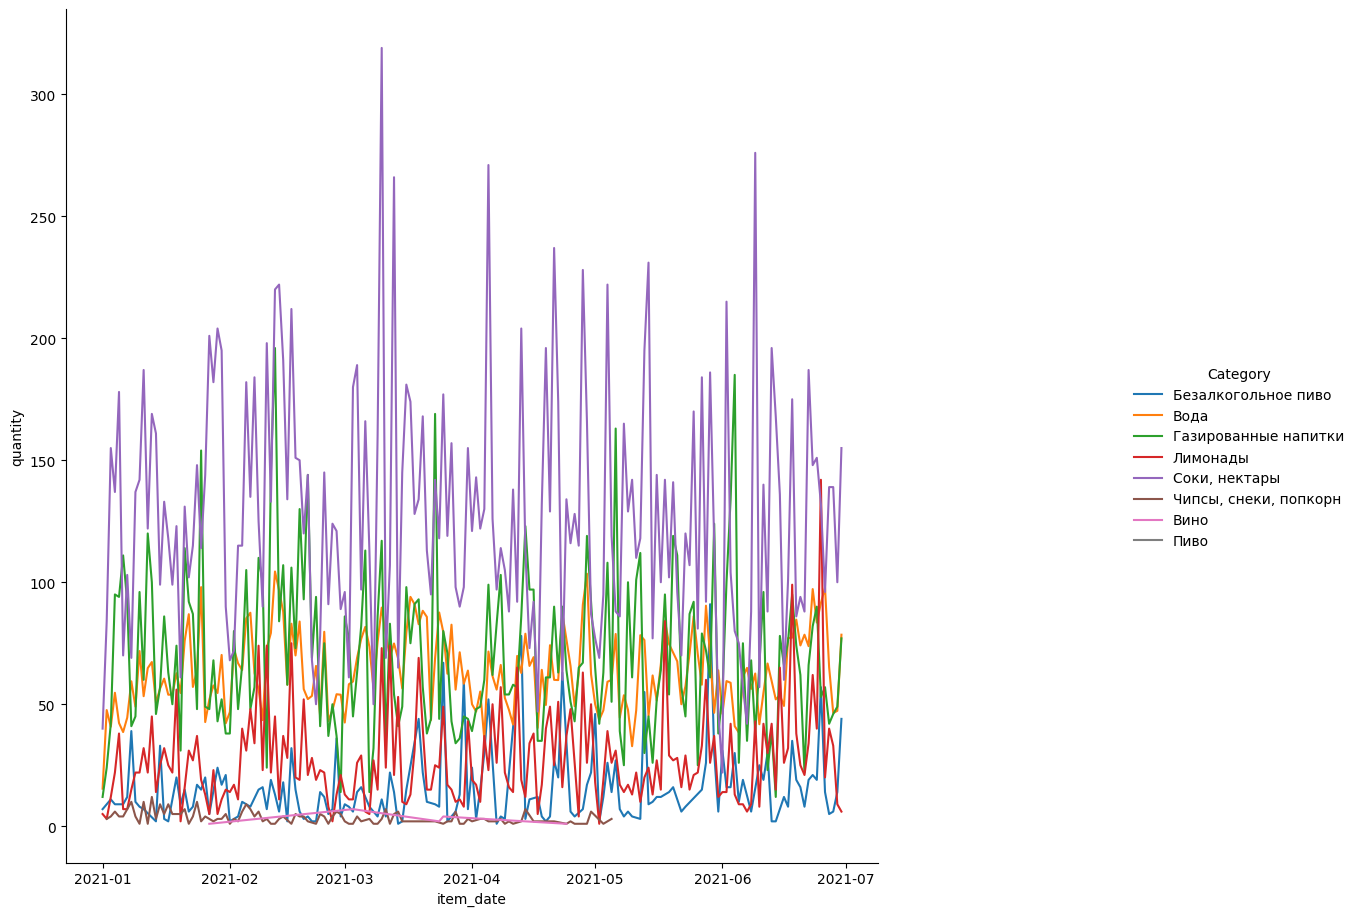

In [23]:
# Визуализировать полученный DataFrame

sns.relplot(
    x='item_date',
    y='quantity',
    hue='Category',
    data=result,
    kind='line')
plt.gcf().set_size_inches(15, 10)

Ответ на задание 4. По данным линейной диаграммы, продажи товаров категории "Чипсы, снеки, попкорн" в количественном выражении наиболее всего корелирует с продажама товаров категории "Вино". Без учета соотношения количества проданных товаров, а только по параметрам интенсивности продаж, товары категории "Чипсы, снеки, попкорн" кореллирует со всеми напитками.